# sklearn 라이브러리를 활용한 모델 예측(22.11.01)
## 작성자 : 오순정

### 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [12]:
# 필요한 라이브러리 선언
import sklearn
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score


In [13]:
# (2) 데이터 준비 /load_digit 준비
#digit 데이터 전체 불러옴
digit=load_digits()
print(digit.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [14]:
# (3)-1 Feature Data 지정하기
#데이터 색 분포
feature_data=digit.data
#피처 데이터 값 -> 8,8 이미지 , 1797 데이터 갯수
print(feature_data[0],feature_data.shape)


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] (1797, 64)


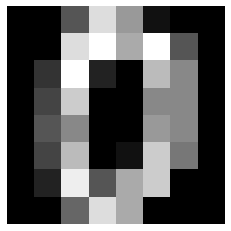

In [15]:
#이미지 데이터 보기
plt.imshow(digit.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In [16]:
# (3)-2 Label Data 지정하기
#숫자 데이터 : 정답지 0,1,2,3,4,5,6,7,8,9 구분
label_data=digit.target
print(label_data,label_data.shape)

[0 1 2 ... 8 9 8] (1797,)


In [17]:
# (3)-3 Target Names 출력해 보기
print(digit.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [18]:
# (3)-4 데이터 Describe 해 보기
digit_dataframe = pd.DataFrame(data=digit.data, columns=digit.feature_names)
digit_dataframe.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [19]:
print(digit.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [21]:
# (4) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(feature_data, 
                                                    label_data, 
                                                    test_size=0.2, 
                                                    random_state=8)



print('X_train 개수: ', len(x_train),', X_test 개수: ', len(x_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


In [22]:
# (5) 다양한 모델로 학습시키기
# (5)-1 Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(x_train, y_train)
y_pred_1 = decision_tree.predict(x_test)
accuracy_1 = accuracy_score(y_test, y_pred_1) # y_pred(답안지)를 y_test(정답지)로 채점

print(classification_report(y_test, y_pred_1)) # 결과 지표를 확인


              precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.79      0.84      0.82        37
           2       0.84      0.84      0.84        32
           3       0.86      0.82      0.84        38
           4       0.88      0.88      0.88        26
           5       0.86      0.88      0.87        49
           6       0.94      0.86      0.90        37
           7       0.93      0.95      0.94        40
           8       0.69      0.76      0.72        33
           9       0.85      0.82      0.84        34

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



In [23]:
# (5)-2 Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train) 
y_pred_2 = random_forest.predict(x_test) 
accuracy_2 = accuracy_score(y_test, y_pred_2) # y_pred(답안지)를 y_test(정답지)로 채점
print(classification_report(y_test, y_pred_2)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        32
           3       1.00      0.92      0.96        38
           4       1.00      0.88      0.94        26
           5       0.96      0.98      0.97        49
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.98        40
           8       0.97      0.94      0.95        33
           9       0.92      0.97      0.94        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [24]:
# (5)-3  SVM 사용해 보기
from sklearn import svm 
svm_model = svm.SVC() 

svm_model.fit(x_train, y_train) 
y_pred_3 = svm_model.predict(x_test)
accuracy_3 = accuracy_score(y_test, y_pred_3) # y_pred(답안지)를 y_test(정답지)로 채점
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        38
           4       1.00      0.96      0.98        26
           5       0.96      0.98      0.97        49
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.97      0.91      0.94        33
           9       0.97      0.97      0.97        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [25]:
# (5)-4  SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 

sgd_model.fit(x_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred_4 = sgd_model.predict(x_test)
accuracy_4 = accuracy_score(y_test, y_pred_4) # y_pred(답안지)를 y_test(정답지)로 채점

print(classification_report(y_test, y_pred_4)) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.86      0.89        37
           2       1.00      1.00      1.00        32
           3       0.95      0.95      0.95        38
           4       1.00      0.96      0.98        26
           5       0.96      0.92      0.94        49
           6       1.00      1.00      1.00        37
           7       1.00      0.95      0.97        40
           8       0.83      0.91      0.87        33
           9       0.87      0.97      0.92        34

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [26]:
# (5)-5  Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression(max_iter=3000) 

logistic_model.fit(x_train, y_train)
y_pred_5 = logistic_model.predict(x_test)

print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.90      0.97      0.94        37
           2       1.00      1.00      1.00        32
           3       1.00      0.95      0.97        38
           4       1.00      0.96      0.98        26
           5       0.96      0.96      0.96        49
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.88      0.88      0.88        33
           9       0.91      0.91      0.91        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [27]:
# 정확도 비교 
accuracy_5 = accuracy_score(y_test, y_pred_5) # y_pred(답안지)를 y_test(정답지)로 채점
accuracy={'dicisiontree':accuracy_1,'random':accuracy_2,'svm':accuracy_3,'sgd':accuracy_4,'logisitic':accuracy_5}
accuracy

{'dicisiontree': 0.8583333333333333,
 'random': 0.9722222222222222,
 'svm': 0.9805555555555555,
 'sgd': 0.95,
 'logisitic': 0.9638888888888889}

### 회고
학습 관련 변수들을 작성하면서 처음에는 그냥 label_data, feature_data로 알아보기 쉽게 1차원적으로 변수명을 적었다. 코드를 작성하다 아차 싶었다. 어떤 데이터에 종속되는지에 대한 설명 없이 label_data, feature_data 로만 작성하다 보니 다른 인공지능 학습할 때 변수가 중복될 가능성이 높았다. 그래서 괜히 아이펠에서 digit_label. digit_data로 적은 게 아니구나 싶으면서 변수명 선정 시 데이터 소속을 명확히 밝히면서 어떤 목적을 갖고 있는지 명시해야함을 느꼈다.

###### 로지스틱 회귀 분류 실패
<에러>ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

수렴 경고: lbfgs가 수렴하지 못했습니다(상태=1):
중지: 총 반복 횟수가 한계에 도달했습니다.

로지스틱 분류가 안되서 경덕님께 여쭤보니 경덕님이 해답을 주셨습니다.!! 말씀하시길 반복횟수가 적어서 문제가 발생한거라고 말씀주셔서 max_iter 변수로 100에서 3000으로 변경하니 문제가 해결되었습니다. 

##### 모델 적합도 
svm > randomforest > logisitic>sgd > decisiontree
선형 벡터 머신 모델이 제일 정확도가 높게 나왔으므로 svm 모델이 적합하다.

그런데 왜 적합한지에 대해 서술을 하고 싶은데 서술을 못하겠다.






## 프로젝트 (2) load_wine : 와인을 분류해 봅시다

In [36]:
#라이브러리 임포트 

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [37]:
# (2) 데이터 준비 
wine=load_wine()
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [38]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

데이터를 살펴보니 feature_data 목록으로 alchol, malic acid, ash 등 와인 감별에 필요한 목록이 있다. 

In [39]:
# (3) 데이터 이해하기
# (3)-1 feature data 지정하기
wine_data=wine.data
wine_data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [44]:
wine_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names']+ ['target'])

wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


민석님과 함께 feature data를 실제로 표로 확인을 하니 칼럼 목록 데이터들이 십진수로 표현됨을 함께 확인했습니다 ㅋㄷ 

In [45]:
# (3)-2 label Data 지정하기

#와인 클래스 0,1,2 중 나눠져있음
wine_label=wine.target
wine_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
# (3-)3 target Names 출력해 보기
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [46]:
# (3)-4 데이터 Describe 해 보기
wine_dataframe = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_dataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [48]:
# (4) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=8)



print('x_train 개수: ', len(x_train),', X_test 개수: ', len(x_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))


x_train 개수:  142 , X_test 개수:  36
y_train 개수:  142 , y_test 개수:  36


In [49]:
# (5) 다양한 모델로 학습시키기
# (5)-1 Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(x_train, y_train)
y_pred_6 = decision_tree.predict(x_test)
accuracy_6 = accuracy_score(y_test, y_pred_6)

print(classification_report(y_test, y_pred_6)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [54]:
# (5)-2 Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train) 
y_pred_7 = random_forest.predict(x_test) 
accuracy_7 = accuracy_score(y_test, y_pred_7)

print(classification_report(y_test, y_pred_7)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [72]:
# (5)-3  SVM 사용해 보기
from sklearn import svm 
svm_model = svm.SVC() 

svm_model.fit(x_train, y_train) 
y_pred_8 = svm_model.predict(x_test)
accuracy_8 = accuracy_score(y_test, y_pred_8)

print(classification_report(y_test, y_pred_8, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.56      1.00      0.72        14
           2       0.00      0.00      0.00        11

    accuracy                           0.64        36
   macro avg       0.46      0.61      0.51        36
weighted avg       0.47      0.64      0.53        36



In [74]:
# (5)-4  SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 

sgd_model.fit(x_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred_9 = sgd_model.predict(x_test)
accuracy_9 = accuracy_score(y_test, y_pred_9)

print(classification_report(y_test, y_pred_9,zero_division=0)) 

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.52      1.00      0.68        14
           2       0.00      0.00      0.00        11

    accuracy                           0.61        36
   macro avg       0.47      0.58      0.49        36
weighted avg       0.47      0.61      0.51        36



In [75]:
# (5)-5  Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression(max_iter=3000) 

logistic_model.fit(x_train, y_train)
y_pred_10 = logistic_model.predict(x_test)
accuracy_10 = accuracy_score(y_test, y_pred_10)

print(classification_report(y_test, y_pred_10))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.82      1.00      0.90        14
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.94      0.91      0.92        36
weighted avg       0.93      0.92      0.92        36



In [76]:
# 정확도 비교 
accuracy={'dicisiontree':accuracy_6,'random':accuracy_7,'svm':accuracy_8,'sgd':accuracy_9,'logisitic':accuracy_10}
accuracy

{'dicisiontree': 1.0,
 'random': 1.0,
 'svm': 0.6388888888888888,
 'sgd': 0.6111111111111112,
 'logisitic': 0.9166666666666666}

### 회고

##### 에러
SVM 모델과 SGD 모델에 zero_division error가 발생하였다.

print(classification_report(y_test, y_pred_9)) 문장에 print(classification_report(y_test, y_pred_9,zero_division=0))에 zero_division error 매개변수를 0으로 추가하여 최소한의 경고를 제한할 수 있다.

https://stackoverflow.com/questions/62326735/metrics-f1-warning-zero-division

##### 모델 정확도
랜덤 포레스트 모델에과 의견결정나무 모델에서 100% 가 나왔다 
정확도 비교하면 
랜덤 포레스트 모델 = 의견결정나무 모델 > 로지스틱 > 선형 이진 분류 > 확률 경사 

아무래도 위 표에서 확인했다시피 alchol,malic_acid	ash	alcalinity_of_ash .. 등 피처 요소들이 다양했다.
의견결정나무 모델이 분류하는 문제에서 대표적으로 사용되는 모델이라 그런지 100% 인데, 여기서 더 확장시킨 랜덤 포레스트 모델이 더욱 다양한 요소들을 고려할 수 있어 100% 정확도를 보인 듯 하다.

## 1-13. 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

In [86]:
#라이브러리 임포트 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [87]:
# (2) 데이터 준비 
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [88]:
# (3) 데이터 이해하기
# (3)-1 feature data 지정하기
cancer_data=cancer.data
cancer_data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

#### 종양 크기에 따른 악성, 양성인지 판단, 정답지 

In [89]:
# (3)-2 label Data 지정하기
cancer_label=cancer.target
cancer_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### 악성, 양성 분류

In [90]:
# (3-)3 target Names 출력해 보기
cancer.target_names
#악성, 양성

array(['malignant', 'benign'], dtype='<U9')

#### 종양 크기에 대한 상세한 정보를 적은 걸 볼 수 있다

In [91]:
# (3)-4 데이터 Describe 해 보기
cancer_dataframe = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
# (4) train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=8)



print('x_train 개수: ', len(x_train),', X_test 개수: ', len(x_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

x_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


모델 학습시키기 전에 .. 
암 진단의 경우 오차 행렬이 필요하다. 양성인데 음성이라 판단할 확률이라던가, 음성인데 양성으로 판단할 확률이라던가,,
정확도만으로 모든 것을 판단할 수 없으므로 암 진단에 있어 양성인데 음성일 확률이 있으면 안돼므로 recall 값을 고려해야한다.

from sklearn.metrics import recall_score
print(recall_acore(y_test, pred))

https://kylo8.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%98%A4%EC%B0%A8%ED%96%89%EB%A0%AC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%A0%95%EB%B0%80%EB%8F%84%EC%9E%AC%ED%98%84%EC%9C%A8

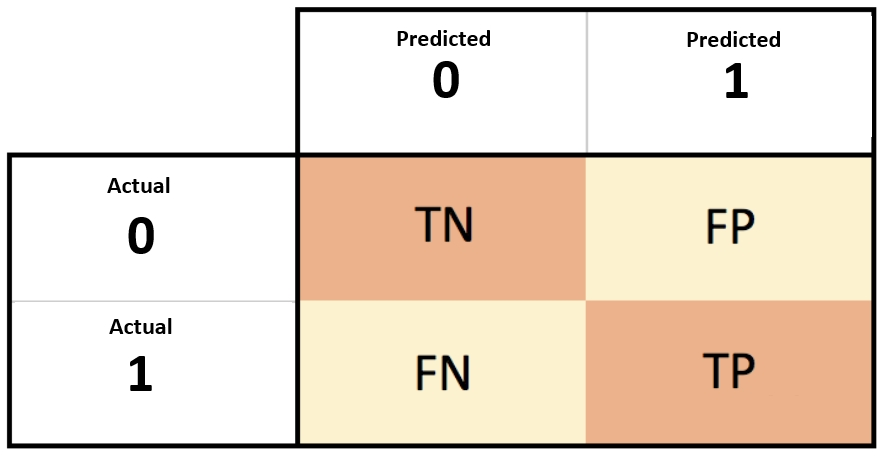
출처: https://driip.me/3ef36050-f5a3-41ea-9f23-874afe665342

In [93]:
# # (5) 다양한 모델로 학습시키기
# (5)-1 Decision Tree 사용해 보기
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier(random_state=32) 
decision_tree.fit(x_train, y_train)
y_pred_11 = decision_tree.predict(x_test)
accuracy_11 = accuracy_score(y_test, y_pred_11)

#리콜 구하기, 라이브러리 함수 호출로 가능
from sklearn.metrics import recall_score 
recall_score_11=recall_score(y_test, y_pred_11)

print(classification_report(y_test, y_pred_11)) 
print(recall_score_11) 

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        46
           1       0.93      0.97      0.95        68

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114

0.9705882352941176


In [94]:
# (5)-2 Random Forest 사용해 보기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(x_train, y_train) 
y_pred_12 = random_forest.predict(x_test) 
accuracy_12 = accuracy_score(y_test, y_pred_12)

from sklearn.metrics import recall_score 
recall_score_12=recall_score(y_test, y_pred_12)


print(classification_report(y_test, y_pred_12)) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        46
           1       0.97      1.00      0.99        68

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [95]:
# (5)-3  SVM 사용해 보기
from sklearn import svm 
svm_model = svm.SVC() 

svm_model.fit(x_train, y_train) 
y_pred_13 = svm_model.predict(x_test)
accuracy_13 = accuracy_score(y_test, y_pred_13)

from sklearn.metrics import recall_score 
recall_score_13=recall_score(y_test, y_pred_13)


print(classification_report(y_test, y_pred_13))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        46
           1       0.92      0.99      0.95        68

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [96]:
# (5)-4  SGD Classifier 사용해 보기
from sklearn.linear_model import SGDClassifier 
sgd_model = SGDClassifier() 

sgd_model.fit(x_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred_14 = sgd_model.predict(x_test)
accuracy_14 = accuracy_score(y_test, y_pred_14)


from sklearn.metrics import recall_score 
recall_score_14=recall_score(y_test, y_pred_14)


print(classification_report(y_test, y_pred_14)) 

              precision    recall  f1-score   support

           0       0.97      0.78      0.87        46
           1       0.87      0.99      0.92        68

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.90       114
weighted avg       0.91      0.90      0.90       114



In [97]:
 #(5)-5  Logistic Regression 사용해 보기
from sklearn.linear_model import LogisticRegression 
logistic_model = LogisticRegression(max_iter=3000) 

logistic_model.fit(x_train, y_train)
y_pred_15 = logistic_model.predict(x_test)
accuracy_15 = accuracy_score(y_test, y_pred_15)

from sklearn.metrics import recall_score 
recall_score_15=recall_score(y_test, y_pred_15)


print(classification_report(y_test, y_pred_15))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        46
           1       0.97      0.97      0.97        68

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [98]:
# 정확도 비교 
accuracy={'dicisiontree':accuracy_11,'random':accuracy_12,'svm':accuracy_13,'sgd':accuracy_14,'logisitic':accuracy_15}
accuracy

{'dicisiontree': 0.9385964912280702,
 'random': 0.9824561403508771,
 'svm': 0.9385964912280702,
 'sgd': 0.9035087719298246,
 'logisitic': 0.9649122807017544}

In [99]:
# 리콜 비교 
accuracy={'dicisiontree':recall_score_11,'random':recall_score_12,'svm':recall_score_13,'sgd':recall_score_14,'logisitic':recall_score_15}
accuracy

{'dicisiontree': 0.9705882352941176,
 'random': 1.0,
 'svm': 0.9852941176470589,
 'sgd': 0.9852941176470589,
 'logisitic': 0.9705882352941176}

### 회고

높은 리콜 기준으로 랜덤> sgd=svm >의견결정나무=로지스틱  순으로 나왔다.

리콜이 100%일 경우 실제 양성일 경우 모두 양성으로 예측한다는 뜻이다. 98%도 높은걸로 보이지만 100명중에 2명을 오진을 한다는 뜻이여서,, 신중해야하는 판별인 만큼 100% 예측 가능한 랜덤 포레스트 모델이 제일 성능이 좋다고 할 수 있다.
